In [2]:
import datetime
import numpy as np
import pandas as pd
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

## Load the data

In [2]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
dataset = data.values
print(dataset.shape)
#dataset split, Y (quality)
Y = dataset[:,11]
print(Y.shape)
X = dataset[:,:11]
print(X.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


(4898, 12)
(4898,)
(4898, 11)


In [75]:
def acc(y_true, y_predict):
    squared_diff = tensorflow.square(y_true-tensorflow.floor(y_predict))
    return tensorflow.reduce_mean(squared_diff,axis=-1)
    

Time required for optimization: 0:00:12.368254
50/50 [==============================] - 0s 2ms/step - loss: 0.4173 - acc: 0.9256 - mse: 0.4173


[0.41733407974243164, 0.9255784749984741, 0.41733407974243164]

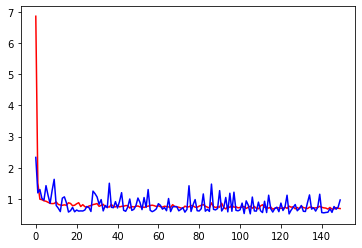

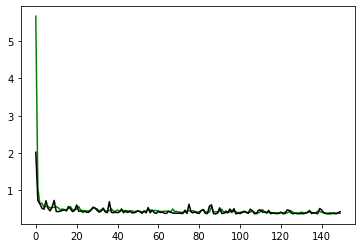

In [83]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime

dataframe = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=";")
dataframe = dataframe.replace(np.nan,0)
dataset = dataframe.values
X = dataset[:,0:11]
Y = dataset[:,11]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
np.random.seed(5072)
Epoch = 150
BatchSize=50
np.random.seed(5072) 

start_time = datetime.datetime.now()
model = Sequential()
model.add(Dense(16,input_dim = 11, activation = "relu"))
model.add(Dense(50,activation = "relu")) 
model.add(Dense(100,activation = "relu"))
model.add(Dense(50,activation = "relu"))
model.add(Dense(1,activation="linear"))
model.compile(loss='mean_squared_error', optimizer = "adam", metrics = [acc,'mse']) 
stop_time = datetime.datetime.now()

estimator = model.fit(X_train, Y_train, validation_data =
 (X_test,Y_test), epochs = Epoch, batch_size =BatchSize, verbose = 0) 

plt.plot(estimator.history['acc'],color='red',label='train acc')
plt.plot(estimator.history['val_acc'],color='blue',label='test acc')
plt.figure()
plt.plot(estimator.history['mse'], color='green', label='train mse')
plt.plot(estimator.history['val_mse'], color='black', label='test mse')
stop_time = datetime.datetime.now()
print ("Time required for optimization:",stop_time - start_time) 
model.evaluate(X,Y)

In [85]:
model.predict(X_train)

array([[5.647006],
       [5.357778],
       [5.63973 ],
       ...,
       [4.755107],
       [6.532731],
       [6.658362]], dtype=float32)

In [86]:
Y_train

array([6., 6., 6., ..., 5., 7., 6.])

## Classification

In [3]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",sep=";")
dataset = data.values
Y = pd.get_dummies(data['quality'])
print(Y.shape)
X = dataset[:,:11]
print(X.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


(4898, 7)
(4898, 11)


In [4]:
Y.shape
print(Y_train.shape, X_train.shape)
print(Y_test.shape, X_test.shape)

(3918, 7) (3918, 11)
(980, 7) (980, 11)


In [5]:
start_time = datetime.datetime.now()
model = Sequential()
model.add(Dense(16,input_dim = 11, activation = "relu"))
model.add(Dense(50,activation = "relu")) 
model.add(Dense(100,activation = "relu"))
model.add(Dense(50,activation = "relu"))
model.add(Dense(7, activation='softmax'))
model.compile(loss="categorical_crossentropy",metrics=["mse"])

history = model.fit(X_train, Y_train, validation_data =
 (X_test,Y_test), epochs = 150, batch_size =50, verbose=0) 
end_time = datetime.datetime.now()
print("time used = "+str(end_time-start_time))

time used = 0:00:40.703267


In [6]:
model.predict(X_train)

array([[8.88709977e-08, 6.85246050e-05, 7.47955171e-03, ...,
        1.44445539e-01, 2.10482880e-01, 2.41314865e-07],
       [5.21642141e-05, 6.20756997e-03, 4.47077900e-01, ...,
        3.52552421e-02, 4.05406393e-03, 2.11308659e-09],
       [3.35524636e-10, 1.19927456e-04, 7.40761915e-03, ...,
        3.56857568e-01, 1.21804997e-01, 4.54481643e-08],
       ...,
       [7.82645131e-08, 1.89038157e-03, 7.66850114e-02, ...,
        2.77822226e-01, 1.17209539e-01, 1.52952780e-04],
       [1.37521052e-08, 2.22326184e-04, 1.68470085e-01, ...,
        5.85476495e-02, 4.72513679e-03, 4.55739396e-13],
       [1.69454346e-04, 7.00436952e-03, 1.21607214e-01, ...,
        3.68193448e-01, 4.47855107e-02, 2.81438784e-04]], dtype=float32)

In [7]:
Y_train

,3,4,5,6,7,8,9
4665,0,0,0,1,0,0,0
1943,0,0,1,0,0,0,0
3399,0,0,0,1,0,0,0
843,0,0,0,0,1,0,0
2580,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
4426,0,0,0,1,0,0,0
466,0,0,0,1,0,0,0
3092,0,0,0,1,0,0,0
3772,0,0,0,1,0,0,0


In [20]:
model.evaluate(X_test,Y_test)

31/31 [==============================] - 0s 2ms/step - loss: 1.2050 - accuracy: 0.5184


[1.2050033807754517, 0.518367350101471]

No handles with labels found to put in legend.


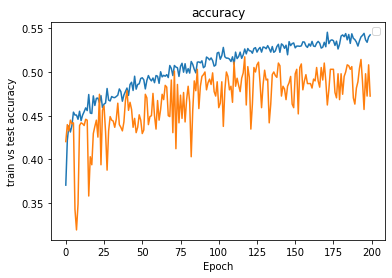

No handles with labels found to put in legend.


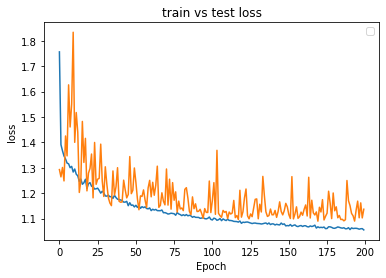

In [54]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("train vs test accuracy")
plt.legend(loc = "upper right")
plt.title("accuracy")
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend(loc="upper right")
plt.title("train vs test loss")
plt.show()

In [31]:
start_time = datetime.datetime.now()
model = Sequential()
model.add(Dense(16,input_dim = 11, activation = "relu"))
model.add(Dense(50,activation = "relu")) 
model.add(Dense(7, activation='softmax'))
model.compile(loss="categorical_crossentropy",metrics=["accuracy"])

history = model.fit(X_train, Y_train, validation_data =
 (X_test,Y_test), epochs = 200, batch_size =50,verbose=0) 
end_time = datetime.datetime.now()
print("time used:", end_time-start_time)

time used: 0:00:41.306322


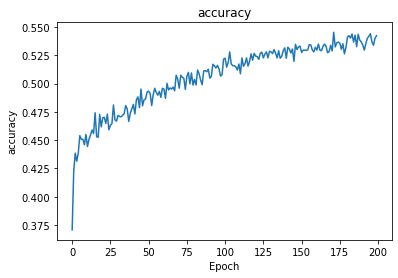

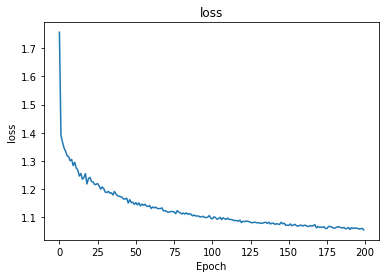

In [32]:
plt.plot(history.history["accuracy"])
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.title("accuracy")
plt.show()
plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.title("loss")
plt.show()